# Imports

In [12]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/CAIS++/F23_Curriculum/Mini_Project/heart.csv'
df = pd.read_csv(file_path)

In [19]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Using All Dimensions

## K Nearest Neighbors

In [15]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [17]:
import sklearn
from sklearn import neighbors
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X_train, y_train)

# the *actual prediction* for each data point (final guess as to which class)
pred = knn.predict(X_test)

# probabilities for each class
scores = knn.predict_proba(X_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, pred))
print('AUROC: ', roc_auc_score(y_test, scores))
print("Overall report:", classification_report(y_test, pred))

Accuracy:  0.7184466019417476
AUROC:  0.7829939668174962
Overall report:               precision    recall  f1-score   support

           0       0.72      0.71      0.71        51
           1       0.72      0.73      0.72        52

    accuracy                           0.72       103
   macro avg       0.72      0.72      0.72       103
weighted avg       0.72      0.72      0.72       103



Try a bunch of values for number of neighbors

In [20]:
num_neighbors = [3,5,10,15,20,30,50,75,100,150,200]
acc_scores = []
auroc_scores = []
for num in num_neighbors:
  knn = neighbors.KNeighborsClassifier(n_neighbors=num, weights='uniform')
  knn.fit(X_train, y_train)
  pred=knn.predict(X_test)
  acc_scores.append(accuracy_score(y_test, pred))
  auroc_scores.append(roc_auc_score(y_test, scores))

Plot performance against number of neighbors

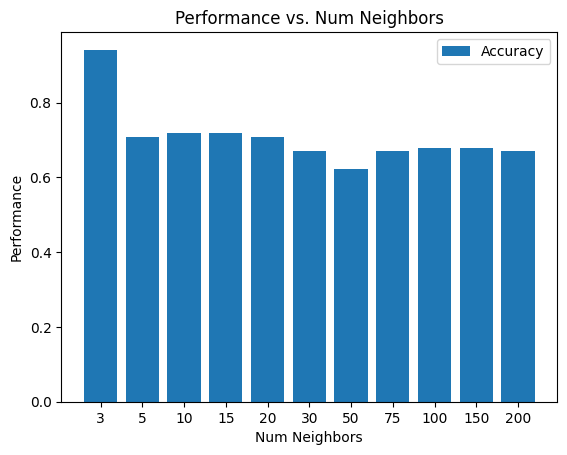

In [26]:
bar_width = 0.35
x = range(len(num_neighbors))
plt.bar(x, acc_scores, label="Accuracy")
plt.xticks(x,num_neighbors)
plt.xlabel('Num Neighbors')
plt.ylabel('Performance')
plt.title('Performance vs. Num Neighbors')
plt.legend()
plt.show()

## Decision Tree

In [ ]:
from sklearn.svm import SVC

# Do it all again with reduced dimensions!

In [11]:
df
df['cp'].describe()

count    1025.000000
mean        0.942439
std         1.029641
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: cp, dtype: float64

# Reduce Dimension

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

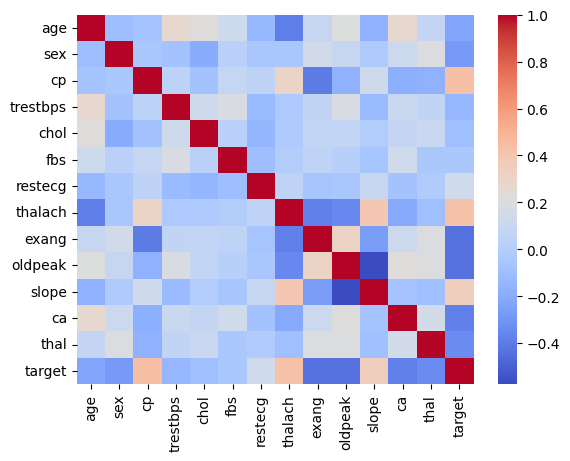

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")

Strongest correlations:

*   cp and target
*   target, thalach and slope
*   List item
*   List item





